In [5]:
import pandas as pd

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

df = pd.read_csv(r'D:\DELLxps13_BK\important file\CENTRALE\BCI ET EEG\feature_cloud.csv',usecols=range(1,4))
electrodes = []
featureName = []
for index, row in df.iterrows():
    for i in range(len(row[0])-3):
        if RepresentsInt(row[0][i]) or row[0][i]=='Z' or row[0][i]=='z' :
            electrodes.append(row[0][0:i+1])
            featureName.append(row[0][i+1:])
df["featureName"]=featureName
df["electrode"]=electrodes
df["plot_electrode"] = electrodes
df=df.drop("Fname",axis=1)
df=df.drop("rank",axis=1)
df['totalImpt'] = df.groupby(['electrode', 'featureName'])['impt'].transform('sum')
df = df.drop_duplicates(subset=['electrode', 'featureName'])
featureNames = df['featureName'].drop_duplicates()
should_exist_electrode = list(df['electrode'].drop_duplicates())
for num, featureName in enumerate(featureNames):
#     print(featureName)
    existed_electrodes = list(df[df['featureName'] == featureName]['electrode'])
#     print(existed_electrodes)
    miss_electrodes = [electrode for electrode in should_exist_electrode if electrode not in existed_electrodes]
#     print(miss_electrodes)
    for electrode in miss_electrodes:
        new_row = {'totalImpt':0, 'featureName':featureName, 'electrode':electrode,'plot_electrode':electrode}
#         print(new_row)
        df = df.append(new_row, ignore_index=True)
df['featureName']=df['featureName'].map({'BetaMean':'MBA_Beta','AlphaMean':'MBA_Alpha','ThetaMean':'MBA_Theta','DeltaMean':'MBA_Delta',
                                         'TBR':'TBR','PAC':'PAC','ATR':'ATR',})

In [16]:
# values = list(df[df['featureName'] == "BetaMean"].loc[:, 'totalImpt'])
# df[df['featureName'] == "BetaMean"]
# df['featureName']=df['featureName'].map({'BetaMean':'MBA_Beta','AlphaMean':'MBA_Alpha','ThetaMean':'MBA_Theta','DeltaMean':'MBA_Delta'})
df

,impt,featureName,electrode,plot_electrode,totalImpt
0,73.614018,ThetaMean,P3,P3,73.614018
1,42.218112,DeltaMean,P3,P3,42.218112
2,27.941945,BetaMean,A1,A1,27.941945
3,21.932447,PAC,O2,O2,79.655221
4,16.014942,DeltaMean,F3,F3,16.014942
...,...,...,...,...,...
121,NaN,AlphaMean,A2,A2,0.000000
122,NaN,AlphaMean,Cz,Cz,0.000000
123,NaN,AlphaMean,FP2,FP2,0.000000
124,NaN,AlphaMean,T4,T4,0.000000


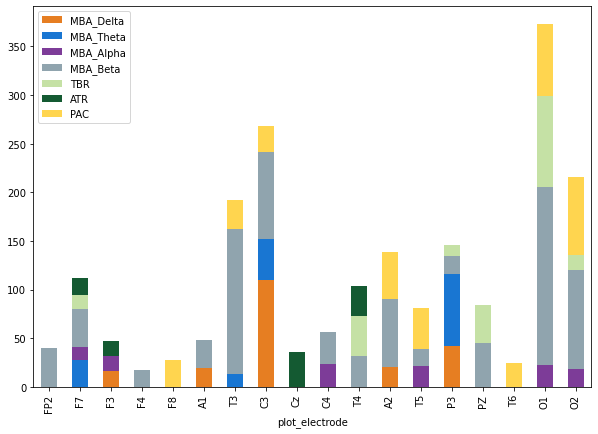

Text(3.200000000000003, 0.5, 'Feature Importance')

In [6]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize=(10,7))  

# featureNames = df['featureName'].drop_duplicates()
# print(featureNames)
featureNames =pd.Series(np.array(['MBA_Delta','MBA_Theta','MBA_Alpha','MBA_Beta','TBR','ATR','PAC']))

margin_bottom = np.zeros(len(df['electrode'].drop_duplicates()))
colors = ["#E67E22", "#1976D2","#7D3C98","#90A4AE", "#C5E1A5", "#145A32","#FFD54F"]

index_norm = list(df['electrode'].drop_duplicates())
index_norm = ['FP2', 'F7', 'F3', 'F4', 'F8','A1','T3', 'C3', 'Cz', 'C4','T4', 'A2', 'T5', 'P3', 'PZ',
              'T6', 'O1', 'O2']

# df = df.set_index("electrode")
for num, featureName in enumerate(featureNames):
    values = list(df[df['featureName'] == featureName].set_index('electrode').reindex(index_norm).loc[:, 'totalImpt'])

    df[df['featureName'] == featureName].set_index('electrode').reindex(index_norm).plot.bar(x='plot_electrode',y='totalImpt', ax=ax, stacked=True, 
                                    bottom = margin_bottom, label=featureName, color=colors[num])
    margin_bottom += values

plt.show()
ax.set_xlabel('Channels')
# ax.set_title('Weighted stacked barplot of feature importance')
ax.set_ylabel('Feature Importance')
# fig.savefig("E:/important file/CENTRALE/BCI ET EEG/weightedFImpt.eps", bbox_inches='tight')

# Visualization of the feature frequency

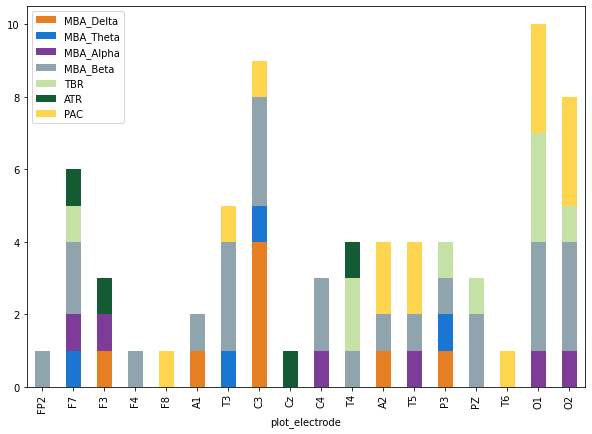

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
import pandas as pd

def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

df = pd.read_csv(r'D:\DELLxps13_BK\important file\CENTRALE\BCI ET EEG\feature_cloud.csv',usecols=range(1,4))
electrodes = []
featureName = []
for index, row in df.iterrows():
    for i in range(len(row[0])-3):
        if RepresentsInt(row[0][i]) or row[0][i]=='Z' or row[0][i]=='z' :
            electrodes.append(row[0][0:i+1])
            featureName.append(row[0][i+1:])
df['frequency']=np.ones(df.shape[0])
df["featureName"]=featureName
df["electrode"]=electrodes
df["plot_electrode"] = electrodes
df=df.drop("Fname",axis=1)
df=df.drop("rank",axis=1)
df=df.drop("impt",axis=1)
df['totalFreq'] = df.groupby(['electrode', 'featureName'])['frequency'].transform('sum')
df = df.drop_duplicates(subset=['electrode', 'featureName'])
df['featureName']=df['featureName'].map({'BetaMean':'MBA_Beta','AlphaMean':'MBA_Alpha','ThetaMean':'MBA_Theta','DeltaMean':'MBA_Delta',
                                         'TBR':'TBR','PAC':'PAC','ATR':'ATR',})

# Filling the blanks
featureNames = df['featureName'].drop_duplicates()
should_exist_electrode = list(df['electrode'].drop_duplicates())
for num, featureName in enumerate(featureNames):
#     print(featureName)
    existed_electrodes = list(df[df['featureName'] == featureName]['electrode'])
#     print(existed_electrodes)
    miss_electrodes = [electrode for electrode in should_exist_electrode if electrode not in existed_electrodes]
#     print(miss_electrodes)
    for electrode in miss_electrodes:
        new_row = {'totalFreq':0, 'featureName':featureName, 'electrode':electrode,'plot_electrode':electrode}
#         print(new_row)
        df = df.append(new_row, ignore_index=True)
    
# Plot
fig, ax = plt.subplots(figsize=(10,7))  

# featureNames = df['featureName'].drop_duplicates()
# print(featureNames)
featureNames =pd.Series(np.array(['MBA_Delta','MBA_Theta','MBA_Alpha','MBA_Beta','TBR','ATR','PAC']))

margin_bottom = np.zeros(len(df['electrode'].drop_duplicates()))
colors = ["#E67E22", "#1976D2","#7D3C98","#90A4AE", "#C5E1A5", "#145A32","#FFD54F"]

index_norm = list(df['electrode'].drop_duplicates())
index_norm = ['FP2', 'F7', 'F3', 'F4', 'F8','A1','T3', 'C3', 'Cz', 'C4','T4', 'A2', 'T5', 'P3', 'PZ',
              'T6', 'O1', 'O2']
for num, featureName in enumerate(featureNames):
    values = list(df[df['featureName'] == featureName].set_index('electrode').reindex(index_norm).loc[:, 'totalFreq'])

    df[df['featureName'] == featureName].set_index('electrode').reindex(index_norm).plot.bar(x='plot_electrode',y='totalFreq', ax=ax, stacked=True, 
                                    bottom = margin_bottom, label=featureName, color=colors[num])
    margin_bottom += values

plt.show()
ax.set_xlabel('Channels')
# ax.set_title('Weighted stacked barplot of feature importance')
ax.set_ylabel('Feature frequency')
fig.savefig("D:/DELLxps13_BK/important file/CENTRALE/BCI ET EEG/Plots4Paper/featureFreq.eps", bbox_inches='tight')

# Confusion matrix Refining - aggregate

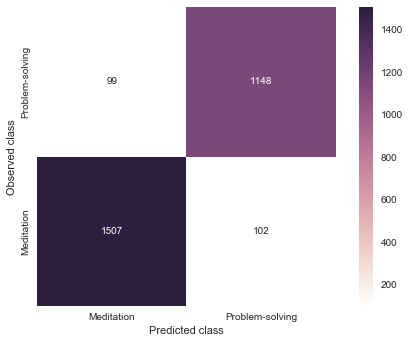

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

mpl.style.use('seaborn')

# conf_arr = np.array([[99,1507],[1148,102]])


# df_cm = pd.DataFrame(conf_arr, 
#   index = [ 'Meditation', 'Problem-solving'],
#   columns = ['Problem-solving', 'Meditation'])

df_cm = pd.DataFrame(np.array([['Problem-solving','Problem-solving',1148],['Problem-solving','Meditation',99],
                               ['Meditation','Problem-solving',102],['Meditation','Meditation',1507]]),
                     columns = ['Observed class', 'Predicted class','cm'])
df_cm['cm'] = df_cm['cm'].astype(int)
df_cm =df_cm.pivot('Observed class', 'Predicted class','cm')


fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
res = sns.heatmap(df_cm, annot=True,  fmt='d', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5], [ 'Meditation', 'Problem-solving'],va='center')

# plt.title('Confusion Matrix')

plt.savefig('E:/important file/CENTRALE/BCI ET EEG/PAC-RFc_confusion_matrix.pdf', dpi=100, bbox_inches='tight' )
plt.show()
plt.close()

# Confusion matrix - scatter plot highlighting experts
cf
 ^  M           FP  TP
 |  PS          TN  FN 
predicted       PS  M
            obeserved ->
experts 
             3   222
            179   4
            
beginners
            96     1285
            969    98


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


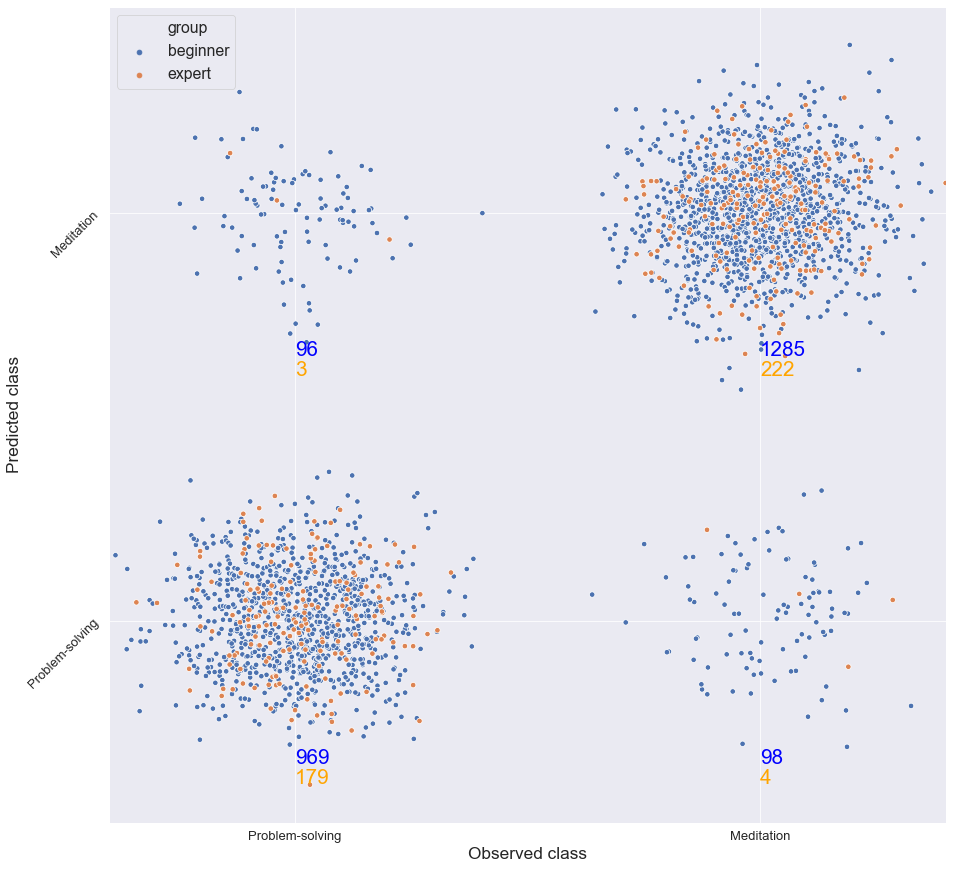

In [5]:
# Using seaborn
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.set_context("paper", font_scale=1.8)
# for experts
# TN
TN_x = np.random.normal(0,0.25,179)
TN_y = np.random.normal(0,0.25,179)
# label = np.array(['PS']*179)
group = np.array(['expert']*179)
df_expertTN = pd.DataFrame(data = np.array([TN_x,TN_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_expertTN['Observed class']=df_expertTN['Observed class'].astype(float)
df_expertTN['Predicted class']=df_expertTN['Predicted class'].astype(float)
#FN
FN_x = np.random.normal(2,0.25,4)
FN_y = np.random.normal(0,0.25,4)
# label = np.array(['M']*4)
group = np.array(['expert']*4)
df_expertFN = pd.DataFrame(data = np.array([FN_x,FN_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_expertFN['Observed class']=df_expertFN['Observed class'].astype(float)
df_expertFN['Predicted class']=df_expertFN['Predicted class'].astype(float)
#FP
FP_x = np.random.normal(0,0.25,3)
FP_y = np.random.normal(2,0.25,3)
# label = np.array(['PS']*3)
group = np.array(['expert']*3)
df_expertFP = pd.DataFrame(data = np.array([FP_x,FP_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_expertFP['Observed class']=df_expertFP['Observed class'].astype(float)
df_expertFP['Predicted class']=df_expertFP['Predicted class'].astype(float)
#TP
TP_x = np.random.normal(2,0.25,222)
TP_y = np.random.normal(2,0.25,222)
# label = np.array(['M']*222)
group = np.array(['expert']*222)
df_expertTP = pd.DataFrame(data = np.array([TP_x,TP_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_expertTP['Observed class']=df_expertTP['Observed class'].astype(float)
df_expertTP['Predicted class']=df_expertTP['Predicted class'].astype(float)
df_expert=pd.concat([df_expertTN,df_expertFN,df_expertFP,df_expertTP])

# for beginners
# TN
TN_x = np.random.normal(0,0.25,969)
TN_y = np.random.normal(0,0.25,969)
# label = np.array(['PS']*179)
group = np.array(['beginner']*969)
df_beginnerTN = pd.DataFrame(data = np.array([TN_x,TN_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_beginnerTN['Observed class']=df_beginnerTN['Observed class'].astype(float)
df_beginnerTN['Predicted class']=df_beginnerTN['Predicted class'].astype(float)
#FN
FN_x = np.random.normal(2,0.25,98)
FN_y = np.random.normal(0,0.25,98)
# label = np.array(['M']*4)
group = np.array(['beginner']*98)
df_beginnerFN = pd.DataFrame(data = np.array([FN_x,FN_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_beginnerFN['Observed class']=df_beginnerFN['Observed class'].astype(float)
df_beginnerFN['Predicted class']=df_beginnerFN['Predicted class'].astype(float)
#FP
FP_x = np.random.normal(0,0.25,96)
FP_y = np.random.normal(2,0.25,96)
# label = np.array(['PS']*3)
group = np.array(['beginner']*96)
df_beginnerFP = pd.DataFrame(data = np.array([FP_x,FP_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_beginnerFP['Observed class']=df_beginnerFP['Observed class'].astype(float)
df_beginnerFP['Predicted class']=df_beginnerFP['Predicted class'].astype(float)
#TP
TP_x = np.random.normal(2,0.25,1285)
TP_y = np.random.normal(2,0.25,1285)
# label = np.array(['M']*222)
group = np.array(['beginner']*1285)
df_beginnerTP = pd.DataFrame(data = np.array([TP_x,TP_y,group]).T,columns = np.array(['Observed class','Predicted class','group']))
df_beginnerTP['Observed class']=df_beginnerTP['Observed class'].astype(float)
df_beginnerTP['Predicted class']=df_beginnerTP['Predicted class'].astype(float)
df_beginner=pd.concat([df_beginnerTN,df_beginnerFN,df_beginnerFP,df_beginnerTP])

# concatenation and plotting
df = pd.concat([df_beginner,df_expert])
fig=plt.figure(figsize=(15,15))
ax = sns.scatterplot(x="Observed class", y="Predicted class",
                     hue="group", data=df,s=30)
ax.set(xlim=(-0.8,2.8))
ax.set_xticks(np.array([0,2]))
ax.set_xticklabels([mpl.text.Text(0,0,'Problem-solving'),mpl.text.Text(2,0,'Meditation')])
ax.set_yticks(np.array([0,2]))
ax.set_yticklabels([mpl.text.Text(0,0,'Problem-solving'),mpl.text.Text(0,2,'Meditation')],rotation=45)
y_ecart = 0.1
ax.text(0,1.3, "96", horizontalalignment='left', size='large', color='blue')
ax.text(2,1.3, "1285", horizontalalignment='left', size='large', color='blue')
ax.text(0,-0.7, "969", horizontalalignment='left', size='large', color='blue')
ax.text(2,-0.7, "98", horizontalalignment='left', size='large', color='blue')
ax.text(0,1.3-y_ecart, "3", horizontalalignment='left', size='large', color='orange')
ax.text(2,1.3-y_ecart, "222", horizontalalignment='left', size='large', color='orange')
ax.text(0,-0.7-y_ecart, "179", horizontalalignment='left', size='large', color='orange')
ax.text(2,-0.7-y_ecart, "4", horizontalalignment='left', size='large', color='orange')
ax.tick_params(labelsize=13)
fig.savefig("E:/important file/CENTRALE/BCI ET EEG/Plots4Paper/overallCF_scatter.eps",bbox_inches = 'tight')

In [81]:
fig.savefig("E:/important file/CENTRALE/BCI ET EEG/Plots4Paper/overallCF_scatter.png",bbox_inches = 'tight')

# Confusion Matrix - ETLA


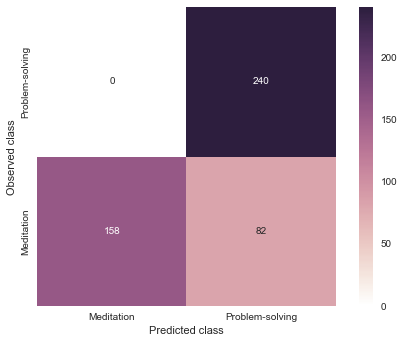

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

mpl.style.use('seaborn')

# conf_arr = np.array([[99,1507],[1148,102]])


# df_cm = pd.DataFrame(conf_arr, 
#   index = [ 'Meditation', 'Problem-solving'],
#   columns = ['Problem-solving', 'Meditation'])

df_cm = pd.DataFrame(np.array([['Problem-solving','Problem-solving',240],['Problem-solving','Meditation',0],
                               ['Meditation','Problem-solving',82],['Meditation','Meditation',158]]),
                     columns = ['Observed class', 'Predicted class','cm'])
df_cm['cm'] = df_cm['cm'].astype(int)
df_cm =df_cm.pivot('Observed class', 'Predicted class','cm')


fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
res = sns.heatmap(df_cm, annot=True,  fmt='d', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5,1.5], [ 'Meditation', 'Problem-solving'],va='center')

# plt.title('Confusion Matrix')

plt.savefig('E:/important file/CENTRALE/BCI ET EEG/PAC-RFc_cmIndpd_ETLA_.pdf', dpi=100, bbox_inches='tight' )
plt.show()
plt.close()

# ETLA Confusion Matrix in scatter plot


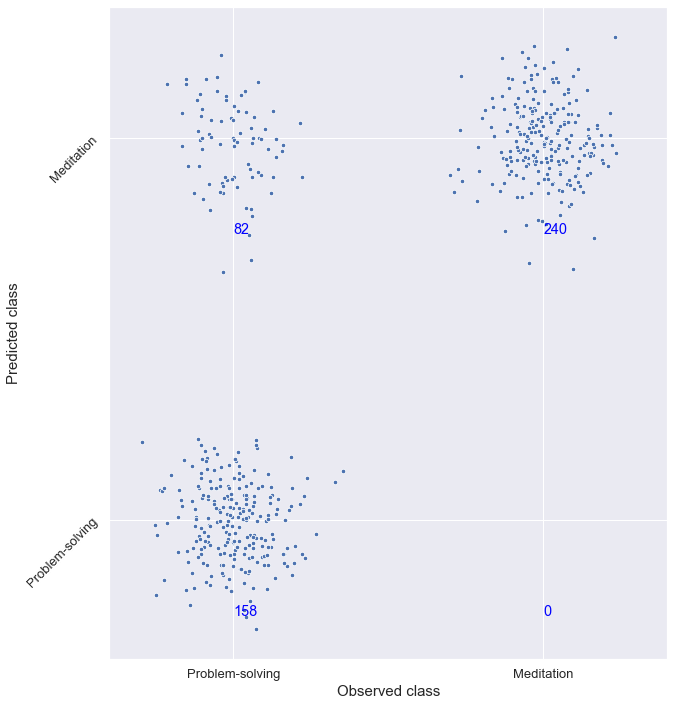

In [6]:
#  ^  M           FP  TP
 
#  |  PS          TN  FN 
 
# predicted       PS  M

#             obeserved ->
            
#              82   158
#              240   0
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_context("paper", font_scale=5)
sns.set(style='darkgrid')
# for experts
# TN
TN_x = np.random.normal(0,0.2,240)
TN_y = np.random.normal(0,0.2,240)
# label = np.array(['PS']*179)
# group = np.array(['expert']*179)
dfTN = pd.DataFrame(data = np.array([TN_x,TN_y]).T,columns = np.array(['Observed class','Predicted class']))
dfTN['Observed class']=dfTN['Observed class'].astype(float)
dfTN['Predicted class']=dfTN['Predicted class'].astype(float)
#FN
# FN_x = np.random.normal(2,0.2,4)
# FN_y = np.random.normal(0,0.2,4)
# # label = np.array(['M']*4)
# group = np.array(['expert']*4)
# df_expertFN = pd.DataFrame(data = np.array([FN_x,FN_y,group]).T,columns = np.array(['observed class','predicted class','group']))
# df_expertFN['observed class']=df_expertFN['observed class'].astype(float)
# df_expertFN['predicted class']=df_expertFN['predicted class'].astype(float)
#FP
FP_x = np.random.normal(0,0.2,82)
FP_y = np.random.normal(2,0.2,82)
# label = np.array(['PS']*3)
# group = np.array(['expert']*3)
dfFP = pd.DataFrame(data = np.array([FP_x,FP_y]).T,columns = np.array(['Observed class','Predicted class']))
dfFP['Observed class']=dfFP['Observed class'].astype(float)
dfFP['Predicted class']=dfFP['Predicted class'].astype(float)
#TP
TP_x = np.random.normal(2,0.2,240)
TP_y = np.random.normal(2,0.2,240)
# label = np.array(['M']*222)
# group = np.array(['expert']*222)
dfTP = pd.DataFrame(data = np.array([TP_x,TP_y]).T,columns = np.array(['Observed class','Predicted class']))
dfTP['Observed class']=dfTP['Observed class'].astype(float)
dfTP['Predicted class']=dfTP['Predicted class'].astype(float)
df=pd.concat([dfTN,dfFP,dfTP])

# plotting
fig=plt.figure(figsize=(10,12))
ax = sns.scatterplot(x="Observed class", y="Predicted class",
                 data=df,s=20)
ax.set(xlim=(-0.8,2.8))
ax.set_xticks(np.array([0,2]))
ax.set_xticklabels([mpl.text.Text(0,0,'Problem-solving'),mpl.text.Text(2,0,'Meditation')])
ax.set_yticks(np.array([0,2]))
ax.set_yticklabels([mpl.text.Text(0,0,'Problem-solving'),mpl.text.Text(0,2,'Meditation')],rotation=45)
y_ecart = 0.1
ax.text(0,1.5, "82", horizontalalignment='left', size='large', color='blue')
ax.text(2,1.5, "240", horizontalalignment='left', size='large', color='blue')
ax.text(0,-0.5, "158", horizontalalignment='left', size='large', color='blue')
ax.text(2,-0.5, "0", horizontalalignment='left', size='large', color='blue')
ax.tick_params(labelsize=13)
ax.set_xlabel("Observed class",fontsize=15)
ax.set_ylabel("Predicted class",fontsize=15)
# ax.text(0,1.5-y_ecart, "3", horizontalalignment='left', size='large', color='orange')
# ax.text(2,1.5-y_ecart, "222", horizontalalignment='left', size='large', color='orange')
# ax.text(0,-0.5-y_ecart, "179", horizontalalignment='left', size='large', color='orange')
# ax.text(2,-0.5-y_ecart, "4", horizontalalignment='left', size='large', color='orange')
fig.savefig("E:/important file/CENTRALE/BCI ET EEG/Plots4Paper/ETLACF_scatter.eps",bbox_inches = 'tight')

# PRBA session-independence 

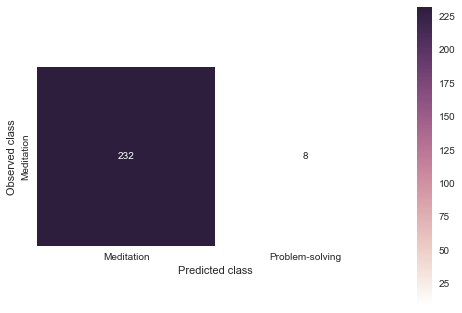

In [51]:
#  ^  M           FP  TP
 
#  |  PS          TN  FN 
 
# predicted       PS  M

#             obeserved ->
            
#              82   158
#              240   0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl

mpl.style.use('seaborn')

# conf_arr = np.array([[99,1507],[1148,102]])


# df_cm = pd.DataFrame(conf_arr, 
#   index = [ 'Meditation', 'Problem-solving'],
#   columns = ['Problem-solving', 'Meditation'])

df_cm = pd.DataFrame(np.array([['Meditation','Problem-solving',8],['Meditation','Meditation',232]]),
                     columns = ['Observed class', 'Predicted class','cm'])
df_cm['cm'] = df_cm['cm'].astype(int)
df_cm =df_cm.pivot('Observed class', 'Predicted class','cm')


fig = plt.figure()

plt.clf()

ax = fig.add_subplot(111)
ax.set_aspect(1)

cmap = sns.cubehelix_palette(light=1, as_cmap=True)

# res = sn.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0, fmt='.2f', cmap=cmap)
res = sns.heatmap(df_cm, annot=True,  fmt='d', cmap=cmap)

res.invert_yaxis()

plt.yticks([0.5], [ 'Meditation'],va='center')

# plt.title('Confusion Matrix')

plt.savefig('E:/important file/CENTRALE/BCI ET EEG/Plots4Paper/PAC-RFc_cmIndpd_PRBA.pdf', dpi=100, bbox_inches='tight' )
plt.show()
plt.close()

# PRBA CF in form of scatters 


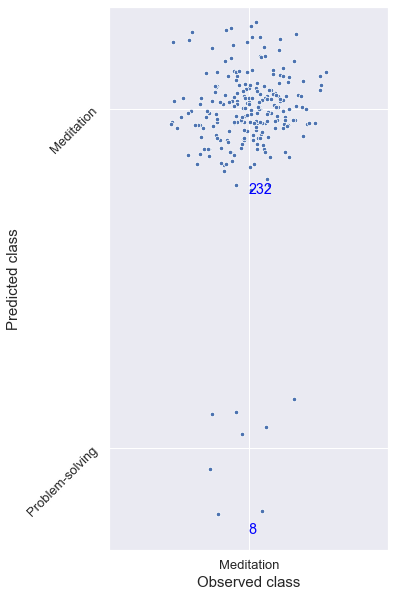

In [7]:
#  ^  M           FP  TP
 
#  |  PS          TN  FN 
 
# predicted       PS  M

#             obeserved ->
            
#              0   232
#              0    8
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
# for experts
# TN
# TN_x = np.random.normal(0,0.2,240)
# TN_y = np.random.normal(0,0.2,240)
# # label = np.array(['PS']*179)
# # group = np.array(['expert']*179)
# dfTN = pd.DataFrame(data = np.array([TN_x,TN_y]).T,columns = np.array(['observed class','predicted class']))
# dfTN['observed class']=dfTN['observed class'].astype(float)
# dfTN['predicted class']=dfTN['predicted class'].astype(float)
# FN
FN_x = np.random.normal(2,0.2,8)
FN_y = np.random.normal(0,0.2,8)
# label = np.array(['M']*4)
# group = np.array(['expert']*4)
dfFN = pd.DataFrame(data = np.array([FN_x,FN_y]).T,columns = np.array(['Observed class','Predicted class']))
dfFN['Observed class']=dfFN['Observed class'].astype(float)
dfFN['Predicted class']=dfFN['Predicted class'].astype(float)
#FP
# FP_x = np.random.normal(0,0.2,82)
# FP_y = np.random.normal(2,0.2,82)
# # label = np.array(['PS']*3)
# # group = np.array(['expert']*3)
# dfFP = pd.DataFrame(data = np.array([FP_x,FP_y]).T,columns = np.array(['observed class','predicted class']))
# dfFP['observed class']=dfFP['observed class'].astype(float)
# dfFP['predicted class']=dfFP['predicted class'].astype(float)
#TP
TP_x = np.random.normal(2,0.2,232)
TP_y = np.random.normal(2,0.2,232)
# label = np.array(['M']*222)
# group = np.array(['expert']*222)
dfTP = pd.DataFrame(data = np.array([TP_x,TP_y]).T,columns = np.array(['Observed class','Predicted class']))
dfTP['Observed class']=dfTP['Observed class'].astype(float)
dfTP['Oredicted class']=dfTP['Predicted class'].astype(float)
df=pd.concat([dfFN,dfTP])

# plotting
fig=plt.figure(figsize=(5,10))
ax = sns.scatterplot(x="Observed class", y="Predicted class",
                 data=df,s=20)
ax.set(xlim=(1.2,2.8),ylim=(-0.6,2.6))
ax.set_xticks(np.array([2]))
ax.set_xticklabels([mpl.text.Text(2,0,'Meditation')])
ax.set_yticks(np.array([0,2]))
ax.set_yticklabels([mpl.text.Text(0,0,'Problem-solving'),mpl.text.Text(0,2,'Meditation')],rotation=45)
y_ecart = 0.1
# ax.text(0,1.5, "82", horizontalalignment='left', size='large', color='blue')
ax.text(2,1.5, "232", horizontalalignment='left', size='large', color='blue')
# ax.text(0,-0.5, "158", horizontalalignment='left', size='large', color='blue')
ax.text(2,-0.5, "8", horizontalalignment='left', size='large', color='blue')
# ax.text(0,1.5-y_ecart, "3", horizontalalignment='left', size='large', color='orange')
# ax.text(2,1.5-y_ecart, "222", horizontalalignment='left', size='large', color='orange')
# ax.text(0,-0.5-y_ecart, "179", horizontalalignment='left', size='large', color='orange')
# ax.text(2,-0.5-y_ecart, "4", horizontalalignment='left', size='large', color='orange')
ax.tick_params(labelsize=13)
ax.set_xlabel("Observed class",fontsize=15)
ax.set_ylabel("Predicted class",fontsize=15)
fig.savefig("E:/important file/CENTRALE/BCI ET EEG/Plots4Paper/PRBACF_scatter.eps",bbox_inches='tight')

# Global classifier plot

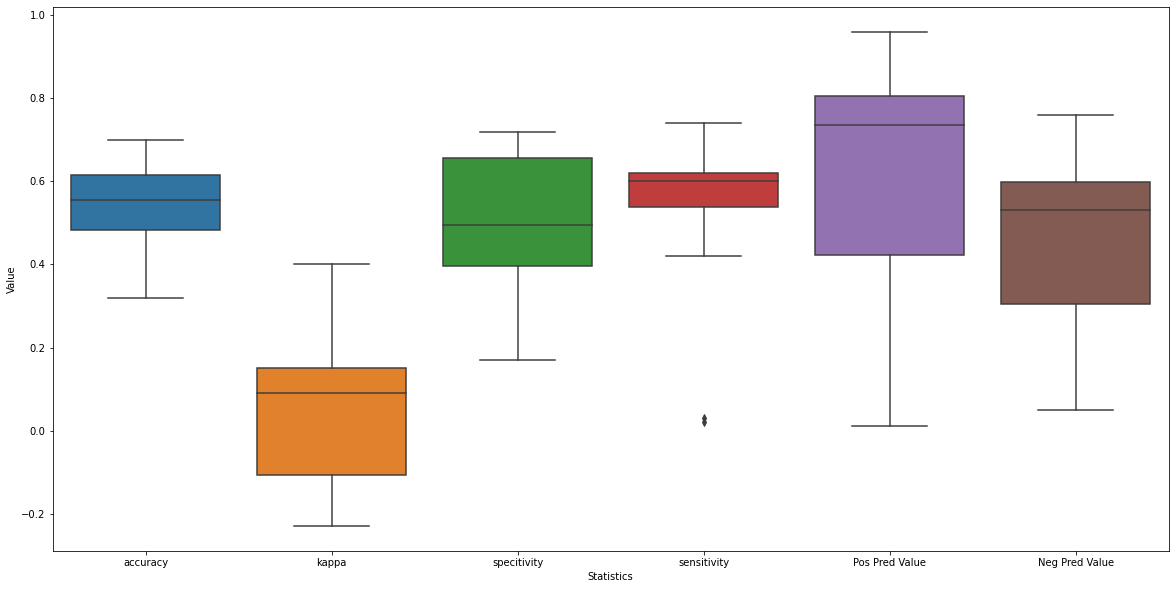

In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
stat_names = np.array(['accuracy','kappa','specitivity','sensitivity','Pos Pred Value','Neg Pred Value']*14)
stat_values = np.array([0.59,0.12,0.55,0.60,0.81,0.30,
                        0.47,-0.16,0.17,0.52,0.79,0.05,
                       0.56,0.07,0.50,0.59,0.75,0.32,
                       0.52,0.08,0.49,0.62,0.41,0.54,
                       .62,.16,.65,.61,.89,.26,
                       .7,.4,.66,.74,.72,.68,
                       .32,-.23,.37,.02,.01,.74,
                       .34,-.21,.37,.03,.01,.76,
                       .67,.29,.70,.66,.86,.42,
                       .68,.34,.66,.69,.77,.56,
                       .38,-.20,.36,.42,.27,.52,
                       .55,.10,.48,.62,.50,.60,
                       .52,.05,.49,.60,.46,.59,
                       .60,.10,.72,.59,.96,.13])
df = pd.DataFrame(data = np.array([stat_names,stat_values]).T,columns = np.array(['Statistics','Value']))
df['Value'] = df['Value'].astype('float')
plt.figure(figsize=(20,10))
ax = sns.boxplot(x="Statistics", y="Value", data=df)
ax.figure.savefig("C:/GT/Medi_L2S/global_RFc_results/boxplot_l1o.eps",bbox_inches='tight')

## statistics

In [13]:
import numpy as np
print(np.array([[0.59,0.12,0.55,0.60,0.81,0.30],
                       [0.47,-0.16,0.17,0.52,0.79,0.05],
                       [0.56,0.07,0.50,0.59,0.75,0.32],
                       [0.52,0.08,0.49,0.62,0.41,0.54],
                       [.62,.16,.65,.61,.89,.26],
                       [.7,.4,.66,.74,.72,.68],
                       [.32,-.23,.37,.02,.01,.74],
                       [.34,-.21,.37,.03,.01,.76],
                       [.67,.29,.70,.66,.86,.42],
                      [.68,.34,.66,.69,.77,.56],
                       [.38,-.20,.36,.42,.27,.52],
                       [.55,.10,.48,.62,.50,.60],
                       [.52,.05,.49,.60,.46,.59],
                       [.60,.10,.72,.59,.96,.13]]).mean(axis=0))
print(np.array([[0.59,0.12,0.55,0.60,0.81,0.30],
                       [0.47,-0.16,0.17,0.52,0.79,0.05],
                       [0.56,0.07,0.50,0.59,0.75,0.32],
                       [0.52,0.08,0.49,0.62,0.41,0.54],
                       [.62,.16,.65,.61,.89,.26],
                       [.7,.4,.66,.74,.72,.68],
                       [.32,-.23,.37,.02,.01,.74],
                       [.34,-.21,.37,.03,.01,.76],
                       [.67,.29,.70,.66,.86,.42],
                      [.68,.34,.66,.69,.77,.56],
                       [.38,-.20,.36,.42,.27,.52],
                       [.55,.10,.48,.62,.50,.60],
                       [.52,.05,.49,.60,.46,.59],
                       [.60,.10,.72,.59,.96,.13]]).std(axis=0))

# print(np.std([0.47,-0.16,0.17,0.52,0.79,0.05]))

[0.53714286 0.065      0.51214286 0.52214286 0.58642857 0.46214286]
[0.11792422 0.19584068 0.15246445 0.21508067 0.30419935 0.21331327]


# End of visualization scripts

In [45]:
flight = sns.load_dataset('flights') # load flights datset from GitHub seaborn repository

# # reshape flights dataeset in proper format to create seaborn heatmap
flights_df = flight.pivot('month', 'year', 'passengers') 
flights_df

# res = sns.heatmap(df_cm,kind='count')
df_cm

Predicted class,Meditation,Problem-solving
Observed class,,
Meditation,1507,102
Problem-solving,99,1148


In [23]:
index_norm = ['FP2', 'F7', 'F3', 'F4', 'F8','A1','T3', 'C3', 'Cz', 'C4','T4', 'A2', 'T5', 'P3', 'PZ',
              'T6', '01', '02']
df.size

210

In [180]:
featureName= "BetaMean"
df[df['featureName'] == featureName].set_index('electrode').reindex(index_norm)

,impt,featureName,totalImpt
electrode,,,
P3,18.567276,BetaMean,18.567276
A1,27.941945,BetaMean,27.941945
O2,16.523305,BetaMean,101.578355
F3,NaN,BetaMean,0.000000
T3,35.300069,BetaMean,148.718624
T6,NaN,BetaMean,0.000000
O1,41.333502,BetaMean,182.376204
C3,32.937764,BetaMean,89.133972
F7,26.413473,BetaMean,39.158594


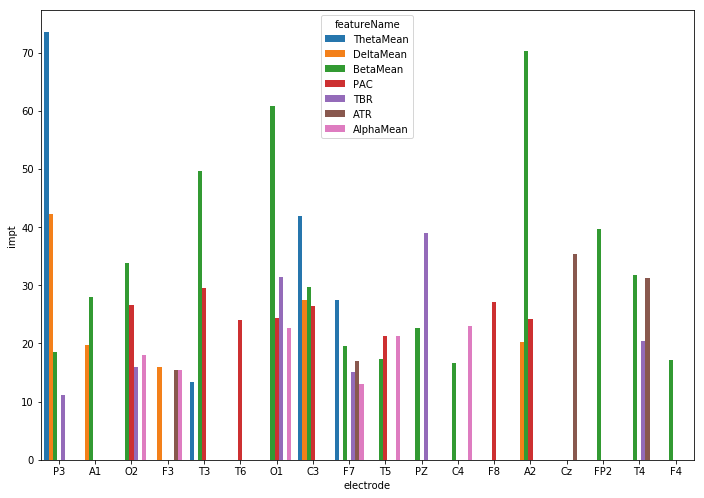

In [58]:
import seaborn as sns

fig, ax = pyplot.subplots(figsize=(11.7, 8.27))

sns.barplot(ax=ax,x='electrode', y='impt', hue='featureName', data=df, saturation=0.9,ci=None)

In [ ]:
from matplotlib.colors import ListedColormap

df.set_index('Fname')\
  .reindex(df.set_index('Fname').sum().sort_values().index, axis=1)\
  .T.plot(kind='bar', stacked=True,
          colormap=ListedColormap(sns.color_palette("GnBu", 10)), 
          figsize=(12,6))

In [61]:
df.set_index('electrode').reindex(df.set_index('eletrode').sum())

,Fname,impt,rank,featureName
electrode,,,,
P3,P3ThetaMean,73.614018,1,ThetaMean
P3,P3DeltaMean,42.218112,2,DeltaMean
A1,A1BetaMean,27.941945,3,BetaMean
O2,O2PAC,21.932447,4,PAC
F3,F3DeltaMean,16.014942,5,DeltaMean
T3,T3BetaMean,35.300069,1,BetaMean
O2,O2PAC,33.668138,2,PAC
T6,T6PAC,24.069084,3,PAC
O1,O1TBR,21.942446,4,TBR


In [66]:
df.sum()

Fname          P3ThetaMeanP3DeltaMeanA1BetaMeanO2PACF3DeltaMe...
impt                                                     2007.15
rank                                                         210
featureName    ThetaMeanDeltaMeanBetaMeanPACDeltaMeanBetaMean...
electrode      P3P3A1O2F3T3O2T6O1C3O1O1O2O2F7O1O2T5O2O1O1C3PZ...
dtype: object